# Analisis de Datos con Python - Clase 8

[Material Complementario](https://1drv.ms/f/s!Anh5cvrOJtUTlPZv1CMNoOt7txeprQ?e=ggipgG)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Modulo 5.- Pandas 6

## 6.1. Groupby
Como hemos visto, es muy fácil hacer estadísticas sobre  columnas de un dataframe. Pero muchas veces estamos  interesados en realizar estadísticas a subconjuntos de  esos datos según la categoría a la que pertenezcan. Por  ejemplo, encontrar el promedio de edad para hombres y  mujeres, o para hombres y mujeres divididos también por  la clase en la que viajaban.

Para este tipo de operaciones existe el método groupby,  que permite hacer los agrupamientos de una forma  eﬁciente y sencilla. Este método crea una estructura de  datos particular a la que le podemos aplicar diferentes  operaciones estadísticas.      
**Sólo cuando aplicamos estas  operaciones se devuelve un dataframe con la información.**


El método groupby sólo crea  la estructura de datos a la que se le puede  aplicar la función de agregación.

In [3]:
data.groupby('Sex')

In [4]:
data.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [5]:
data.groupby('Sex').mean()['Age']

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [13]:
data[['Survived', 'Pclass']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


In [14]:
data[['Survived', 'Pclass']].groupby('Pclass').sum() / data[['Survived', 'Pclass']].groupby('Pclass').count()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [15]:
# cantidad de valores no nulos por columna agrupados por sobrevivencia
data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


En caso de querer realizar varias operaciones a los mismos  grupos se puede utilizar aggregate (o su alias, agg).


In [16]:
data[['Age', 'Pclass']].groupby('Pclass').agg(['min', 'max','mean','std'])

Age                            
         min   max       mean        std
Pclass                                  
1       0.92  80.0  38.233441  14.802856
2       0.67  70.0  29.877630  14.001077
3       0.42  74.0  25.140620  12.495398

También se puede agrupar por  varias categorías, haciendo  agrupamientos más especíﬁcos.  Por ejemplo, el promedio de edad  discriminando tanto por clase  como por sexo.

In [19]:
data[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).mean()

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

# Modulo 5.- Pandas 7

## 7.1. Gráficos
Pandas ofrece muchas facilidades para hacer gráﬁcos de  manera sencilla. Se basa en Matplotlib, el principal  módulo de gráﬁcos de Python, que estudiaremos la  próxima clase, para realizar los gráﬁcos.

Podemos acceder a las funcionalidades para graﬁcar a  través del método plot. Permite acceder a distintos tipos  de gráﬁcos de forma sencilla. Por ejemplo, se pueden  hacer histogramas con plot.hist(), gráﬁcos de barras  con plt.bar, y de torta con plt.pie().


### 7.1.1. Histogramas
Un histograma es una representación  de la distribución de un conjunto de  números. El rango se divide en barras  y la altura de la barra es proporcional a  la cantidad de datos que entran en el  rango de la barra (ancho). Se puede  deﬁnir la cantidad de barras a mostrar.


<AxesSubplot:ylabel='Frequency'>

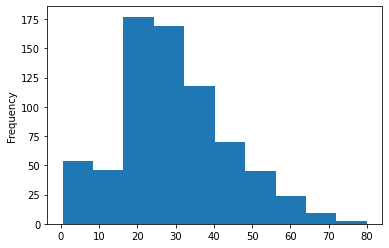

In [22]:
data['Age'].plot.hist()

Los métodos vienen con algunos parámetros para controlar el  aspecto del gráﬁco.

<AxesSubplot:title={'center':'Distribucion de edades'}, ylabel='Frequency'>

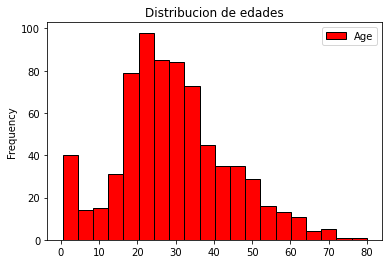

In [26]:
data['Age'].plot.hist(bins = 20, title = 'Distribucion de edades', legend = True, color = 'red', edgecolor = 'black' )

<AxesSubplot:title={'center':'Distribucion de edades'}, ylabel='Frequency'>

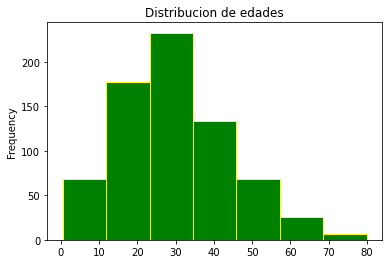

In [24]:
data['Age'].plot.hist(bins = 7, title = 'Distribucion de edades', legend = False, color = 'green', edgecolor = 'yellow' )

### 7.1.2. Gráfico de Barras
Este tipo de gráﬁcos muestra barras de altura variable. En general, son útiles para  mostrar estadísticas tomadas por categorías por medio de groupby.

<AxesSubplot:xlabel='Sex'>

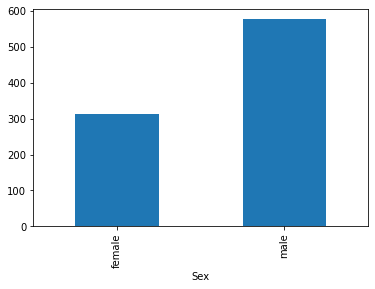

In [28]:
data.groupby('Sex').size().plot.bar()

<AxesSubplot:xlabel='Sex'>

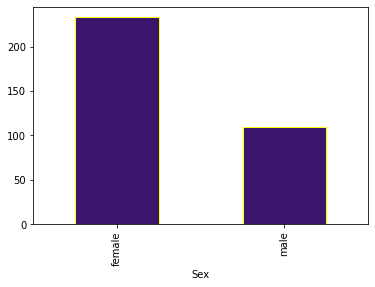

In [32]:
data.groupby('Sex')['Survived'].sum().plot.bar(color = '#39156c', edgecolor = 'yellow')

### 7.1.3. Gráfico de Torta
Otra forma de representar  este tipo de información  es el gráﬁco de tortas,  donde el área de la cuña  es proporcional al número  que representa.

<AxesSubplot:title={'center':'Proporcion de hombres y mujeres'}, ylabel='None'>

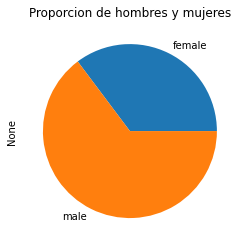

In [33]:
data.groupby('Sex').size().plot.pie(title = 'Proporcion de hombres y mujeres')

### 7.1.3. Gráfico de Lineas
Si los datos están ordenados se puede usar plot  para representarlos sobre una línea en donde el  eje x es el índice de la serie y el eje y es el valor.

Si este método se aplica sobre un dataframe, las  columnas numéricas se muestran en el mismo  gráﬁco compartiendo el eje x. A continuación  creamos un dataset para practicar.


In [36]:
arr = np.random.randn(1000,4).cumsum(axis = 0)
arr

array([[ -0.07511295,   0.12862672,   0.10531478,   1.22897061],
       [  1.84725976,   0.74655171,   0.26535879,   0.77036161],
       [  0.700801  ,   0.96007578,  -0.10058755,   1.26605292],
       ...,
       [ 48.38267642,   0.59513907,   8.3517401 , -34.86215367],
       [ 48.54278254,   0.9055783 ,   9.99322158, -33.39221347],
       [ 48.44847131,  -0.32924729,  10.84371787, -32.85940826]])

In [37]:
df = pd.DataFrame(arr, columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.075113,0.128627,0.105315,1.228971
1,1.847260,0.746552,0.265359,0.770362
2,0.700801,0.960076,-0.100588,1.266053
3,-0.210207,0.251891,0.779720,1.832390
4,0.253635,1.991917,-0.480762,3.158831
...,...,...,...,...
995,49.951718,1.661873,8.784084,-33.039379
996,48.042150,1.084230,8.559835,-33.057162
997,48.382676,0.595139,8.351740,-34.862154
998,48.542783,0.905578,9.993222,-33.392213


<AxesSubplot:>

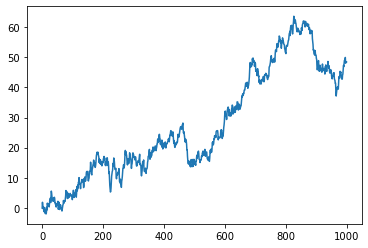

In [38]:
df['A'].plot()

<AxesSubplot:>

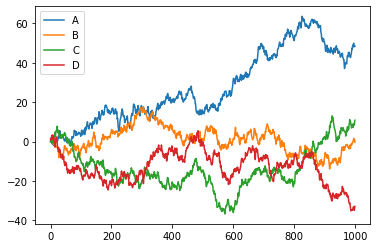

In [39]:
df.plot()

# Modulo 5.- Pandas 8

## 8.1. Missing values
Tener un dataset con missing values es un caso muy  común a la hora de trabajar con datos. Puede suceder  que algunos datos se hayan perdido, por lo que no  estén disponibles, o que no se hayan recolectado  correctamente. Incluso puede suceder que la  información jamás haya existido.

Existen varias técnicas a la hora de trabajar con  missing values y pandas ofrece funcionalidades para  manipularlos.


Para representar missing values pandas usa  principalmente el valor np.nan (NaN: Not a  Number). Este es un valor especial dentro de  los números ﬂotantes.


In [40]:
np.nan
type(np.nan)

float

Como np.nan es un ﬂotante, cuando se  encuentra en una columna de enteros,  toda la columna es promovida al tipo de  dato ﬂotante.

In [41]:
df = pd.DataFrame({'A': [1, 3, 5, 4, 2], 'B': [8, 2, np.nan, 1, 5]})
df

,A,B
0,1,8.0
1,3,2.0
2,5,NaN
3,4,1.0
4,2,5.0


A la hora de hacer cálculos entre NaN y otros valores,  el resultado siempre se promueve a NaN.

Sin embargo, algunos métodos permiten controlar  cómo se trata los missing values. Los métodos  asociados a los operadores permite deﬁnir un valor a  reemplazar para NaN antes de realizar la operación.


In [42]:
df['A'] + df['B']

0    9.0
1    5.0
2    NaN
3    5.0
4    7.0
dtype: float64

In [44]:
df['A'].add(df['B'], fill_value = 0)

0    9.0
1    5.0
2    5.0
3    5.0
4    7.0
dtype: float64

A su vez, las funciones de agregación también  permiten controlar cómo se trata NaN.
Por defecto son ignorados, pero se puede controlar  con el parámetro skipna.


In [45]:
df.mean()

A    3.0
B    4.0
dtype: float64

In [46]:
df.mean(skipna = False)

A    3.0
B    NaN
dtype: float64

## 8.2. isna
Para detectar missing values está el método
isna (o su alias, isnull).

Este método mapea los datos del dataframe  o serie a booleanos. Sólo mapea np.nan y  None a True y cualquier otro valor a False.

Alternativamente, está el método notna (y su  alias, notnull) para hacer el mapeo inverso.


In [47]:
df.isna()

,A,B
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False


In [48]:
df.notna()

,A,B
0,True,True
1,True,True
2,True,False
3,True,True
4,True,True


Teniendo en cuenta que True se  trata como 1 y False como 0,  podemos realizar estadísticas sobre  la cantidad de missing values.


In [50]:
# cantidad de NaN por columna en el dataset del Titanic
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 8.3. dropna
Una forma de tratar los NaN es simplemente  descartarlos.

El método dropna elimina las ﬁlas que  contengan al menos un NaN. Se puede  limitar las columnas a considerar con el  parámetro subset o eliminar las ﬁlas con  todas las columnas NaN con how.


In [52]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


## 8.4. fillna
Para no perder tanta información, también  es posible reemplazar los NaN por un valor  que consideremos apropiado con el método  fillna.

Por ejemplo, reemplazar los NaN en la  columna Age por el promedio de edad.


In [54]:
data['Age'].fillna(data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

29.69911764705882

## 8.5. interpolate
Cuando tenemos datos ordenados  (por ejemplo una serie de tiempo) se  pueden interpolar los datos faltantes  con el método interpolate.


<AxesSubplot:>

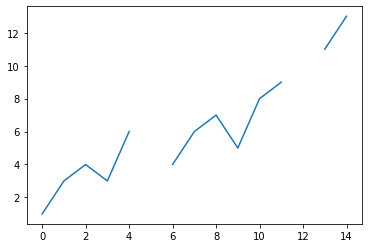

In [55]:
s = pd.Series([1, 3, 4, 3, 6, np.nan, 4, 6, 7, 5, 8, 9, np.nan, 11, 13])
s.plot()


Por defecto hace una interpolación lineal, pero se pueden especiﬁcar otros métodos.



In [57]:
x = s.interpolate()
x

0      1.0
1      3.0
2      4.0
3      3.0
4      6.0
5      5.0
6      4.0
7      6.0
8      7.0
9      5.0
10     8.0
11     9.0
12    10.0
13    11.0
14    13.0
dtype: float64

<AxesSubplot:>

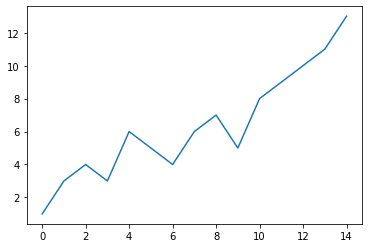

In [58]:
s.interpolate().plot()